In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load data for classification

titanic_train = pd.read_csv('../../data/titanic_train.csv')
titanic_test = pd.read_csv('../../data/titanic_test.csv')
pd.set_option('max_columns', None)
pd.set_option('max_rows', 5)

In [3]:
# load data for regression

melb = pd.read_csv('../../data/melb_data.csv')

hp_train = pd.read_csv('../../data/house-prices-advanced-regression-techniques/train.csv')
hp_test = pd.read_csv('../../data/house-prices-advanced-regression-techniques/test.csv')

pd.set_option('max_columns', None)
pd.set_option('max_rows', 5)

---
# **Preprocessing**
---

In [4]:
from sklearn.model_selection import train_test_split

y_melb = melb.Price
X_melb = melb.drop(['Price'], axis=1)

In [35]:
# drop non-numerical data
X_melb_dnn = X_melb.select_dtypes(exclude=['object'])

In [37]:
X_melb_dnn

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0
13579,4,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,-37.81188,144.88449,6543.0


---
## **Missing values**

three approaches:
1. drop columns with missing values
2. imputation
3. an extension to imputation

### **drop columns with missing values**

In [38]:
X_melb_dmv = X_melb_dnn.dropna(axis=1)

In [39]:
X_melb_dmv

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,202.0,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,156.0,-37.80790,144.99340,4019.0
...,...,...,...,...,...,...,...,...,...
13578,4,6.8,3016.0,4.0,1.0,866.0,-37.85908,144.89299,6380.0
13579,4,6.3,3013.0,4.0,1.0,362.0,-37.81188,144.88449,6543.0


### **imputation**

In [45]:
from sklearn.impute import SimpleImputer

my_imputer_1 = SimpleImputer()

In [47]:
X_melb_imput = pd.DataFrame(my_imputer_1.fit_transform(X_melb_dnn))

In [48]:
X_melb_imput.columns = X_melb_dnn.columns

In [49]:
X_melb_imput

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,4019.0
1,2.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13578,4.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,-37.85908,144.89299,6380.0
13579,4.0,6.3,3013.0,4.0,1.0,1.0,362.0,112.00000,1920.000000,-37.81188,144.88449,6543.0


### **an extension to imputation**

In [40]:
from sklearn.impute import MissingIndicator

In [50]:
my_imputer_2 = MissingIndicator()

In [51]:
X_melb_indi = pd.DataFrame(my_imputer_2.fit_transform(X_melb_dnn))

In [52]:
X_melb_indi

,0,1,2
0,False,True,True
1,False,False,False
...,...,...,...
13578,False,False,False
13579,False,False,False


In [53]:
X_melb_indicator = X_melb_imput.join(X_melb_indi)

In [54]:
X_melb_indicator

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,0,1,2
0,2.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,4019.0,False,True,True
1,2.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,4019.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,4.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,-37.85908,144.89299,6380.0,False,False,False
13579,4.0,6.3,3013.0,4.0,1.0,1.0,362.0,112.00000,1920.000000,-37.81188,144.88449,6543.0,False,False,False


In [55]:
X_melb_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  float64
 1   Distance       13580 non-null  float64
 2   Postcode       13580 non-null  float64
 3   Bedroom2       13580 non-null  float64
 4   Bathroom       13580 non-null  float64
 5   Car            13580 non-null  float64
 6   Landsize       13580 non-null  float64
 7   BuildingArea   13580 non-null  float64
 8   YearBuilt      13580 non-null  float64
 9   Lattitude      13580 non-null  float64
 10  Longtitude     13580 non-null  float64
 11  Propertycount  13580 non-null  float64
 12  0              13580 non-null  bool   
 13  1              13580 non-null  bool   
 14  2              13580 non-null  bool   
dtypes: bool(3), float64(12)
memory usage: 1.3 MB


---
## **Categorical values**

three approaches:

1. drop categorical variables
2. label encoding
3. one-hot encoding

In [5]:
# cardinality is mean how many unique values in column
low_cardinality_cols = [cname for cname in X_melb.columns if X_melb[cname].nunique() < 10 and X_melb[cname].dtype == "object"]

In [6]:
low_cardinality_cols

['Type', 'Method', 'Regionname']

In [23]:
X_melb

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [24]:
X_melb['CouncilArea'].nunique()

33

In [ ]:
X_me

### **drop categorical variables**

In [5]:
X_melb_dcv = X_melb.select_dtypes(exclude=['object'])

In [6]:
X_melb_dcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Distance       13580 non-null  float64
 2   Postcode       13580 non-null  float64
 3   Bedroom2       13580 non-null  float64
 4   Bathroom       13580 non-null  float64
 5   Car            13518 non-null  float64
 6   Landsize       13580 non-null  float64
 7   BuildingArea   7130 non-null   float64
 8   YearBuilt      8205 non-null   float64
 9   Lattitude      13580 non-null  float64
 10  Longtitude     13580 non-null  float64
 11  Propertycount  13580 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.2 MB


In [7]:
X_melb_dcv

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0
13579,4,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,-37.81188,144.88449,6543.0


### **label encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [8]:
X_melb['Type_labels'] = label_encoder.fit_transform(X_melb['Type'])

In [13]:
X_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Date           13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

### **one-hot encoding**

In [14]:
from sklearn.preprocessing import OneHotEncoder

OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH = pd.DataFrame(OH_enc.fit_transform(X_melb[low_cardinality_cols]))

In [15]:
OH

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13579,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **normalization**

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
data = [[1], [2], [3]]
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaler.var_

array([0.66666667])

In [14]:
scaler.transform([[2]])

array([[0.]])

# **Classification**
---

## Decision Tree Classifier
## Nearest Neighbors Method
## Logistic Regression
## Perceptron
## Ridge Classifier
## SGD Classifier

# **Regression**
---

## **Decision Tree Regressor**

In [8]:
# drop all rows with NA variables
melb = melb.dropna(axis=0)

In [10]:
y = melb.Price
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = melb[features]

In [12]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(X, y)

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Define model
melb_model = DecisionTreeRegressor()

# fit model
melb_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
from sklearn.metrics import mean_absolute_error

pred = melb_model.predict(valid_X)
mean_absolute_error(valid_y, pred)

247056.3034215623

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

train_X, valid_X, train_y, valid_y = train_test_split(X_melb_indicator, y_melb)

# Define model
melb_model = DecisionTreeRegressor(criterion='friedman_mse')

# fit model
melb_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [115]:
from sklearn.metrics import mean_absolute_error

pred = melb_model.predict(valid_X)
mean_absolute_error(valid_y, pred)

239407.8645066274

In [105]:
melb_model.tree_

In [86]:
melb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

## **Linear Regression**

$$y = w_0 + w_1 x_1 + ... + w_p x_p$$ 

we must find $w_0, w_1, ... , w_p$

$$min||Xw - y||_2^2$$

In [11]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

In [12]:
# 4, 9, 11, 14, 17 - X
# 6, 7, 11, 9, 13 - y
# y = w_1*x + w_0
model_LR.fit([[4], [9], [11], [14], [17]], [6, 7, 11, 9, 13])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# w_1
model_LR.coef_

array([0.5])

In [15]:
# w_0
model_LR.intercept_
# y = 0.5*x + 3.7 

3.6999999999999984

In [19]:
model_LR.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred_LR = model_LR.predict(valid_X)
mean_absolute_error(valid_y, pred_LR)

304712.5332312765

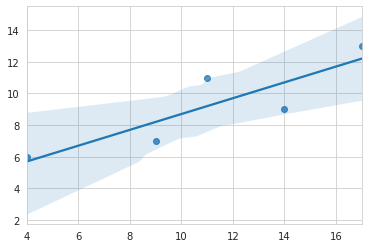

In [25]:
#plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
sns.regplot(x=[4, 9, 11, 14, 17], y=[6, 7, 11, 9, 13]);

In [177]:
model_LR_neg = LinearRegression()
model_LR_neg.fit([[4], [9], [11], [14], [17]], [20, 9, 7, 5, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
# w_1
model_LR_neg.coef_

array([-1.33673469])

In [179]:
# w_0
model_LR_neg.intercept_

23.304081632653066

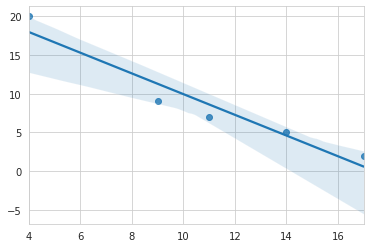

In [180]:
#plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
sns.regplot(x=[4, 9, 11, 14, 17], y=[20, 9, 7, 5, 2]);

## **Ridge**

linear regression with Regularization:
$$min||Xw - y||_2^2 + \alpha ||w||_2^2$$

In [167]:
from sklearn.linear_model import Ridge

model_R = Ridge(alpha=100)

In [168]:
# 4, 9, 11, 14, 17 - X
# 6, 7, 11, 9, 13 - y
# y = w_1*x + w_0
model_R.fit([[4], [9], [11], [14], [17]], [6, 7, 11, 9, 13])

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [169]:
# w_1
model_R.coef_

array([0.24747475])

In [170]:
# w_0
model_R.intercept_
# y = 0.5*x + 3.7 

6.477777777777776

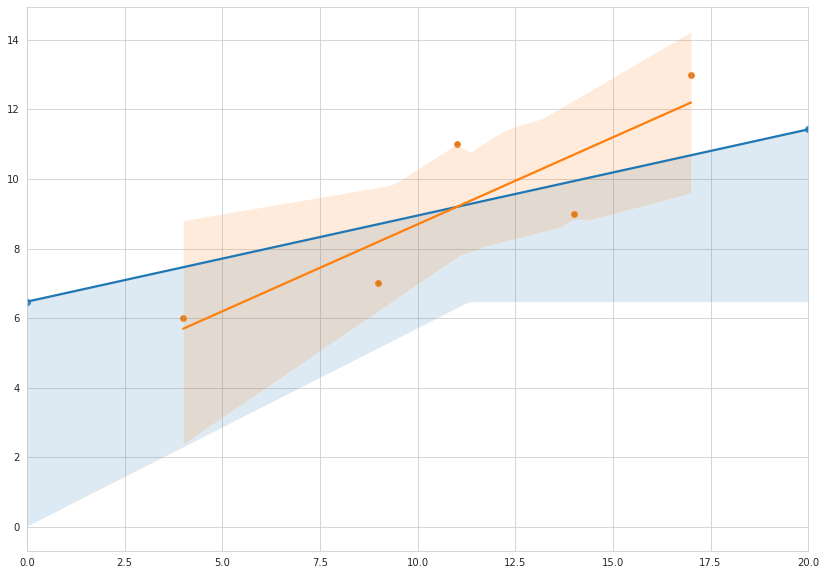

In [171]:
# blue line with regularization
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
sns.scatterplot(x=[4, 9, 11, 14, 17], y=[6, 7, 11, 9, 13]);
sns.regplot(x=[0, 20], y=[model_R.coef_ * 0 + model_R.intercept_, model_R.coef_ * 20 + model_R.intercept_])
sns.regplot(x=[4, 9, 11, 14, 17], y=[6, 7, 11, 9, 13]);

In [188]:
model_R_neg = Ridge(alpha=10)
model_R_neg.fit([[4], [9], [11], [14], [17]], [20, 9, 7, 5, 2])

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

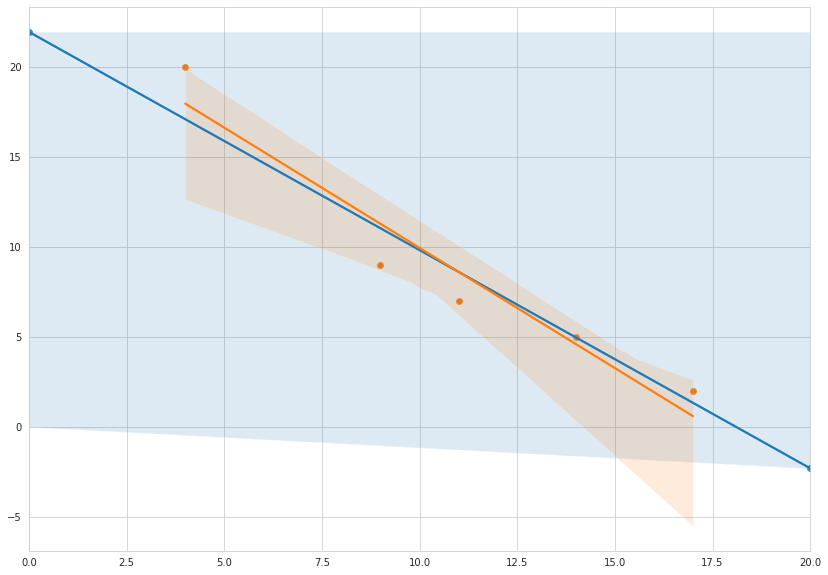

In [189]:
# blue line with regularization
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
sns.scatterplot(x=[4, 9, 11, 14, 17], y=[20, 9, 7, 5, 2]);
sns.regplot(x=[0, 20], y=[model_R_neg.coef_ * 0 + model_R_neg.intercept_, model_R_neg.coef_ * 20 + model_R_neg.intercept_])
sns.regplot(x=[4, 9, 11, 14, 17], y=[20, 9, 7, 5, 2]);

In [193]:
from sklearn.linear_model import RidgeCV

In [199]:
model_RidgeCV = RidgeCV(alphas=np.logspace(-6, 6, 13))

In [200]:
# 4, 9, 11, 14, 17 - X
# 6, 7, 11, 9, 13 - y
# y = w_1*x + w_0
model_RidgeCV.fit([[4], [9], [11], [14], [17]], [6, 7, 11, 9, 13])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [201]:
# w_1
model_RidgeCV.coef_

array([0.49494949])

In [202]:
# w_0
model_RidgeCV.intercept_

3.7555555555557616

In [203]:
# w_1
model_RidgeCV.alpha_

1.0

In [21]:
from sklearn.linear_model import Ridge

model_R = Ridge()

In [22]:
model_R.fit(train_X, train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
pred_R = model_R.predict(valid_X)
mean_absolute_error(valid_y, pred_R)

304795.2030165817

## **SGD Regressor**

In [195]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(alpha=0.0001, max_iter=10000, loss='huber')

In [196]:
model_SGD.fit(train_X, train_y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [197]:
pred_SGD = model_SGD.predict(valid_X)
mean_absolute_error(valid_y, pred_SGD)

377898.50926290144

# **Metrics**

In [11]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y)

In [ ]:
train_X

In [ ]:
train_y

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Define
melb_model = DecisionTreeRegressor()

# fit model
melb_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import mean_absolute_error

pred = melb_model.predict(val_X)
mean_absolute_error(val_y, pred)

In [ ]:
dir()

In [13]:
from basic import get_mae_ensemble

In [ ]:
good_mln = 1
min_my_mae = 10**100
for max_leaf_nodes in range(100, 600):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    if my_mae < min_my_mae:
        good_mln = max_leaf_nodes
        min_my_mae = my_mae
    # print('Max leaf nodes: %d \t\t Mean Absolute Error: %d' %(max_leaf_nodes, my_mae))
    
print(good_mln, min_my_mae)

In [16]:
good_n = 1
min_my_mae_ensemble = 10**100
for n_estimators in range(80, 120):
    my_mae = get_mae_ensemble(n_estimators, train_X, val_X, train_y, val_y)
    if my_mae < min_my_mae_ensemble:
        good_n = n_estimators
        min_my_mae_ensemble = my_mae
    print('Max leaf nodes: %d \t\t Mean Absolute Error: %d' %(n_estimators, my_mae))
    
print(good_n, min_my_mae_ensemble)

Max leaf nodes: 80 		 Mean Absolute Error: 182561
Max leaf nodes: 81 		 Mean Absolute Error: 181543
Max leaf nodes: 82 		 Mean Absolute Error: 180642
Max leaf nodes: 83 		 Mean Absolute Error: 181976
Max leaf nodes: 84 		 Mean Absolute Error: 179568
Max leaf nodes: 85 		 Mean Absolute Error: 180730
Max leaf nodes: 86 		 Mean Absolute Error: 180650
Max leaf nodes: 87 		 Mean Absolute Error: 182023
Max leaf nodes: 88 		 Mean Absolute Error: 181346
Max leaf nodes: 89 		 Mean Absolute Error: 180210
Max leaf nodes: 90 		 Mean Absolute Error: 180528
Max leaf nodes: 91 		 Mean Absolute Error: 180160
Max leaf nodes: 92 		 Mean Absolute Error: 181462
Max leaf nodes: 93 		 Mean Absolute Error: 181119
Max leaf nodes: 94 		 Mean Absolute Error: 179397
Max leaf nodes: 95 		 Mean Absolute Error: 182538
Max leaf nodes: 96 		 Mean Absolute Error: 180202
Max leaf nodes: 97 		 Mean Absolute Error: 179243
Max leaf nodes: 98 		 Mean Absolute Error: 180389
Max leaf nodes: 99 		 Mean Absolute Error: 180847
